<a href="https://colab.research.google.com/github/anthonymoisan/DeepLearningPredictHousePrices/blob/master/src/Project_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description du projet

Le projet consiste à prévoir le prix de maisons en fonction d'un certain nombre de caractéristiques. Ce projet est issu d'un défi Kaggle que l'on peut retrouver [ici](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data "Link to Kaggle").

L'objectif de ce projet sera :
* de comprendre les variables explicatives et la variable cible en faisant une analyse exploratoire des données
* de définir un premier modèle qui sera dans le cas présent une régression linéaire
* de mettre en place un réseau de neurones
* de faire une analyse comparative entre les deux modèles

# Type de problème
On est typiquement dans une problématique de régression dans le cas d'un apprentissage supervisé.

# Librairies

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Les librairies propres à Tensorflow ou Scikit-Learn seront importées au moment de leur utilisation

# Lecture du jeu de données



## Taille du jeu de données


In [79]:
df = pd.read_csv("https://raw.githubusercontent.com/anthonymoisan/DeepLearningPredictHousePrices/master/input/train.csv")
print("taille du jeu de donnees :", df.shape)
df.head(10)

taille du jeu de donnees : (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

On regarde les informations assez rapidement sur les variables

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Gestion des variables catégorielles
On regarde les valeurs uniques pour identifier les variables catégorielles

In [81]:
for colname, serie in df.iteritems():
    print(colname + " has " + str(serie.drop_duplicates().shape[0]) + " unique values.")

Id has 1460 unique values.
MSSubClass has 15 unique values.
MSZoning has 5 unique values.
LotFrontage has 111 unique values.
LotArea has 1073 unique values.
Street has 2 unique values.
Alley has 3 unique values.
LotShape has 4 unique values.
LandContour has 4 unique values.
Utilities has 2 unique values.
LotConfig has 5 unique values.
LandSlope has 3 unique values.
Neighborhood has 25 unique values.
Condition1 has 9 unique values.
Condition2 has 8 unique values.
BldgType has 5 unique values.
HouseStyle has 8 unique values.
OverallQual has 10 unique values.
OverallCond has 9 unique values.
YearBuilt has 112 unique values.
YearRemodAdd has 61 unique values.
RoofStyle has 6 unique values.
RoofMatl has 8 unique values.
Exterior1st has 15 unique values.
Exterior2nd has 16 unique values.
MasVnrType has 5 unique values.
MasVnrArea has 328 unique values.
ExterQual has 4 unique values.
ExterCond has 5 unique values.
Foundation has 6 unique values.
BsmtQual has 5 unique values.
BsmtCond has 5 un

A la vue du fichier de description, qui est aussi confirmée par le nombre de modalités, un certain nombre de variables peuvent être redéfinies en variables catégorielles. 

__**Initialement**__ : on avait décidé de remettre les noms longs des modalités mais les graphiques n'étaient plus par la suite lisibles. On s'est aussi aperçu que les modalités NA des dictionnaires n'étaient pas bien pris en compte initialement et donc on a utilisé la fonction fillna avec le code suivant :

In [0]:
def DefineCategoricalVariableAndDefineNa(myDf):
    myDf["MSSubClass"] = pd.Categorical(myDf["MSSubClass"], ordered=False)
    myDf["MSZoning"] = pd.Categorical(myDf["MSZoning"], ordered=False)
    myDf["Street"] = pd.Categorical(myDf["Street"], ordered=False).rename_categories({'Grvl':'Gravel','Pave':'Paved'})
    myDf["Alley"].fillna('No alley access', inplace = True)
    myDf["Alley"] = pd.Categorical(myDf["Alley"], ordered=False).rename_categories({'Grvl':'Gravel','Pave':'Paved'})
    myDf["LotShape"] = pd.Categorical(myDf["LotShape"], ordered=False)
    myDf["LandContour"] = pd.Categorical(myDf["LandContour"], ordered=False)
    myDf["Utilities"] = pd.Categorical(myDf["Utilities"], ordered=False)
    myDf["LotConfig"] = pd.Categorical(myDf["LotConfig"], ordered=False)
    myDf["LandSlope"] = pd.Categorical(myDf["LandSlope"], ordered=False)
    myDf["Neighborhood"] = pd.Categorical(myDf["Neighborhood"], ordered=False)
    myDf["Condition1"] = pd.Categorical(myDf["Condition1"], ordered=False)
    myDf["Condition2"] = pd.Categorical(myDf["Condition2"], ordered=False)
    myDf["BldgType"] = pd.Categorical(myDf["BldgType"], ordered=False)
    myDf["HouseStyle"] = pd.Categorical(myDf["HouseStyle"], ordered=False)
    myDf["OverallQual"] = pd.Categorical(myDf["OverallQual"], ordered=True)
    myDf["OverallCond"] = pd.Categorical(myDf["OverallCond"], ordered=True)
    myDf["RoofStyle"] = pd.Categorical(myDf["RoofStyle"], ordered=False)
    myDf["RoofMatl"] = pd.Categorical(myDf["RoofMatl"], ordered=False)
    myDf["Exterior1st"] = pd.Categorical(myDf["Exterior1st"], ordered=False)
    myDf["Exterior2nd"] = pd.Categorical(myDf["Exterior2nd"], ordered=False)
    myDf["MasVnrType"] = pd.Categorical(myDf["MasVnrType"], ordered=False)
    myDf["ExterQual"] = pd.Categorical(myDf["ExterQual"], ordered=True)
    myDf["ExterCond"] = pd.Categorical(myDf["ExterCond"], ordered=True)
    myDf["Foundation"] = pd.Categorical(myDf["Foundation"], ordered=False)
    myDf["BsmtQual"].fillna("No Basement", inplace=True)
    myDf["BsmtQual"] = pd.Categorical(myDf["BsmtQual"], ordered=True)
    myDf["BsmtCond"].fillna("No Basement", inplace=True)
    myDf["BsmtCond"] = pd.Categorical(myDf["BsmtCond"], ordered=True)
    myDf["BsmtExposure"].fillna("No Basement", inplace=True)
    myDf["BsmtExposure"] = pd.Categorical(myDf["BsmtExposure"], ordered=True)
    myDf["BsmtFinType1"].fillna("No Basement", inplace=True)
    myDf["BsmtFinType2"].fillna("No Basement", inplace=True)
    myDf["BsmtFinType1"] = pd.Categorical(myDf["BsmtFinType1"], ordered=True)
    myDf["BsmtFinType2"] = pd.Categorical(myDf["BsmtFinType2"], ordered=True)
    myDf["Heating"] = pd.Categorical(myDf["Heating"], ordered=False)
    myDf["HeatingQC"] = pd.Categorical(myDf["HeatingQC"], ordered=True)
    myDf["CentralAir"] = pd.Categorical(myDf["CentralAir"], ordered=False).rename_categories({'N': 'No', 'Y':'Yes'})
    myDf["Electrical"] = pd.Categorical(myDf["Electrical"], ordered=False)
    myDf["KitchenQual"] = pd.Categorical(myDf["KitchenQual"], ordered=True)
    myDf["Functional"] = pd.Categorical(myDf["Functional"], ordered=True)
    myDf["FireplaceQu"].fillna("No Fireplace", inplace=True)
    myDf["FireplaceQu"] = pd.Categorical(myDf["FireplaceQu"], ordered=True)
    myDf["GarageType"].fillna("No Garage", inplace=True)
    myDf["GarageType"] = pd.Categorical(myDf["GarageType"], ordered=False)
    myDf["GarageFinish"].fillna("No Garage", inplace=True)
    myDf["GarageFinish"] = pd.Categorical(myDf["GarageFinish"], ordered=False)
    myDf["GarageQual"].fillna("No Garage", inplace=True)
    myDf["GarageCond"].fillna("No Garage", inplace=True)
    myDf["GarageQual"] = pd.Categorical(myDf["GarageQual"], ordered=True)
    myDf["GarageCond"] = pd.Categorical(myDf["GarageCond"], ordered=True)
    myDf["PavedDrive"] = pd.Categorical(myDf["PavedDrive"], ordered=False).rename_categories({'Y':'Paved','P':'Partial Pavement','N':'Dirt/Gravel'})
    myDf["PoolQC"].fillna("No Pool", inplace=True)
    myDf["PoolQC"] = pd.Categorical(myDf["PoolQC"], ordered=True)
    myDf["Fence"].fillna("No Fence", inplace = True)
    myDf["Fence"] = pd.Categorical(myDf["Fence"], ordered=False)
    myDf["MiscFeature"].fillna('None', inplace = True)
    myDf["MiscFeature"] = pd.Categorical(myDf["MiscFeature"], ordered=False)
    myDf["SaleType"] = pd.Categorical(myDf["SaleType"], ordered=False)
    myDf["SaleCondition"] = pd.Categorical(myDf["SaleCondition"], ordered=False)

In [83]:
DefineCategoricalVariableAndDefineNa(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null category
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-

Les données semblent correctement typées.

L'analyse sommaire des données permet de voir les éléments suivants :

* le premier champs est un identifiant numérique

![Identifiant](https://github.com/anthonymoisan/DeepLearningPredictHousePrices/blob/master/img/Identifiant.PNG?raw=1)

* on a ensuite des champs permettant de caractériser **la localisation et les caractéristiques de la propriété**

![Localisation](https://github.com/anthonymoisan/DeepLearningPredictHousePrices/blob/master/img/localisation.PNG?raw=1)

* on a des champs définissant ensuite des **informations générales sur la construction**

![Informations générales](https://github.com/anthonymoisan/DeepLearningPredictHousePrices/blob/master/img/Infos.PNG?raw=1)

* on a des champs décrivant **la toiture, l'emprise au sol, le sous-sol**

![Exterieur](https://github.com/anthonymoisan/DeepLearningPredictHousePrices/blob/master/img/Exterieur.PNG?raw=1)

* on a des champs décrivant les **accès aux commodités** (électrique, chauffage, air conditioné...)

![Commodites](https://github.com/anthonymoisan/DeepLearningPredictHousePrices/blob/master/img/commodites.PNG?raw=1)

* on a des champs décrivant la **maison au-dessus du sous-sol**

![Interieur](https://github.com/anthonymoisan/DeepLearningPredictHousePrices/blob/master/img/Interieur.PNG?raw=1)

* on a des champs décrivant des **commodités spéciales (piscines, vérandas) et le garage**

![GarageExterieur](https://github.com/anthonymoisan/DeepLearningPredictHousePrices/blob/master/img/GaragesetExterieur.PNG?raw=1)

* on a enfin des champs décrivant les **caractéristiques de la vente**

![Vente](https://github.com/anthonymoisan/DeepLearningPredictHousePrices/blob/master/img/Vente.PNG?raw=1)




# Exploration

## Valeurs manquantes

In [84]:
# Nombre de valeurs manquantes par variable
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


On peut observer qu'il y a peu de données manquantes sur ce dataset : un petit problème avec la variable LotFrontage avec une complétion à 83%.

## Exploration univariée

### La variable cible

On va regarder la distribution de notre variable à expliquer à savoir le prix des logements.

In [85]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

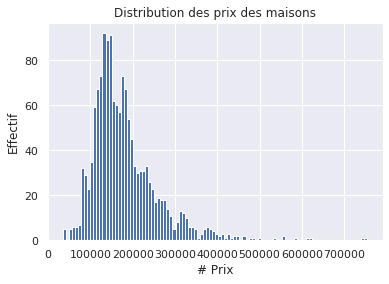

In [86]:
df["SalePrice"].hist(bins=100)
plt.title("Distribution des prix des maisons")
plt.xlabel("# Prix")
plt.ylabel("Effectif")
plt.show()

La cible de notre modèle s'apparente à une log-normale. Elle a pour moyenne 181 K et un écart type de l'ordre de 80 K avec une plage de valeurs compris entre 35 K et 755 K.

### Les autres variables numériques

In [87]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num = df_num.drop(["SalePrice", "Id"], axis = 1)
df_num.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f386fa4b0b8>,
      dtype=object)

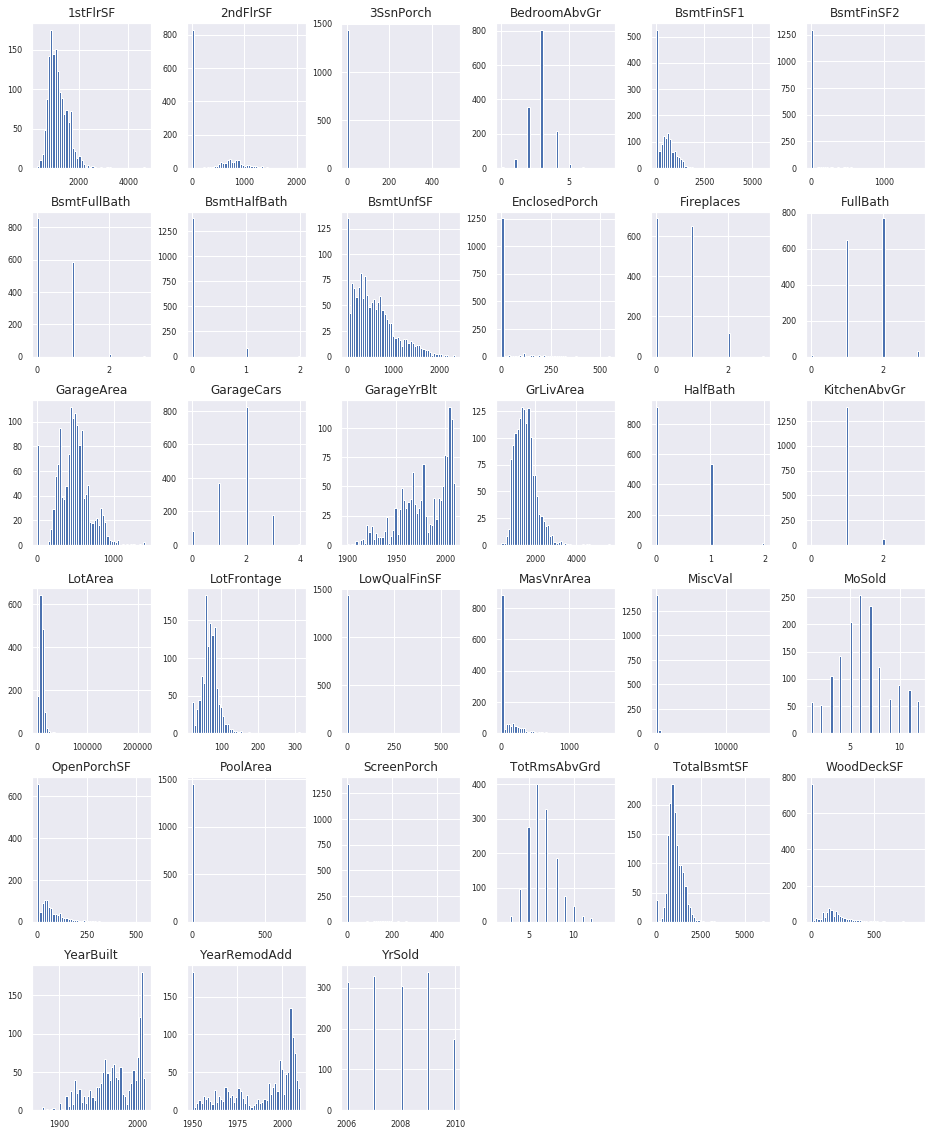

In [88]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

On peut observer :
* sur la **la localisation et les caractéristiques de la propriété**
  * que les variables LotFrontage et LotArea ont une distribution de type LogNormal comme la cible
  * que la variable LotArea a des valeurs extrêmes supérieures
* sur les **informations générales sur la construction**
  * des années de construction entre 1872 et 2010
  * des années de rénovation entre 1950 et 2010
* sur la **la toiture, l'emprise au sol, le sous-sol**
  * que la valeur surface de maçonnerie a des valeurs extrêmes de même que les variables BsmtFinSF1 et BsmtFinSF2 
  * que les variables TotalBsmtSF et BsmtUnfSF ont aussi une distribution de type LogNormal
* sur les caractéristiques de la **maison au-dessus du sous-sol**
  * que la surface habitable a une distribution de type LogNormal
  * que la majorité des maisons ont un étage
  * que le nombre de chambres le plus important en terme de modalités est 3
  * des informations sur les salles de bains, douches, cheminées avec des modalités comprises entre 0 et 3
* sur les **commodités spéciales (piscines, vérandas) et le garage**
  * 2 places de parking est la modalité la plus présente
  * une surface du garage qui suit aussi une loi normale
* sur les **caractéristiques des ventes** :
  * que les années de vente sont comprises entre 2006 et 2010, 
  * que les 12 mois sont représentés avec une gaussienne avec des ventes plus importantes sur l'été

### Les variables catégorielles

In [0]:
df_cat = df.select_dtypes(include = ['category'])

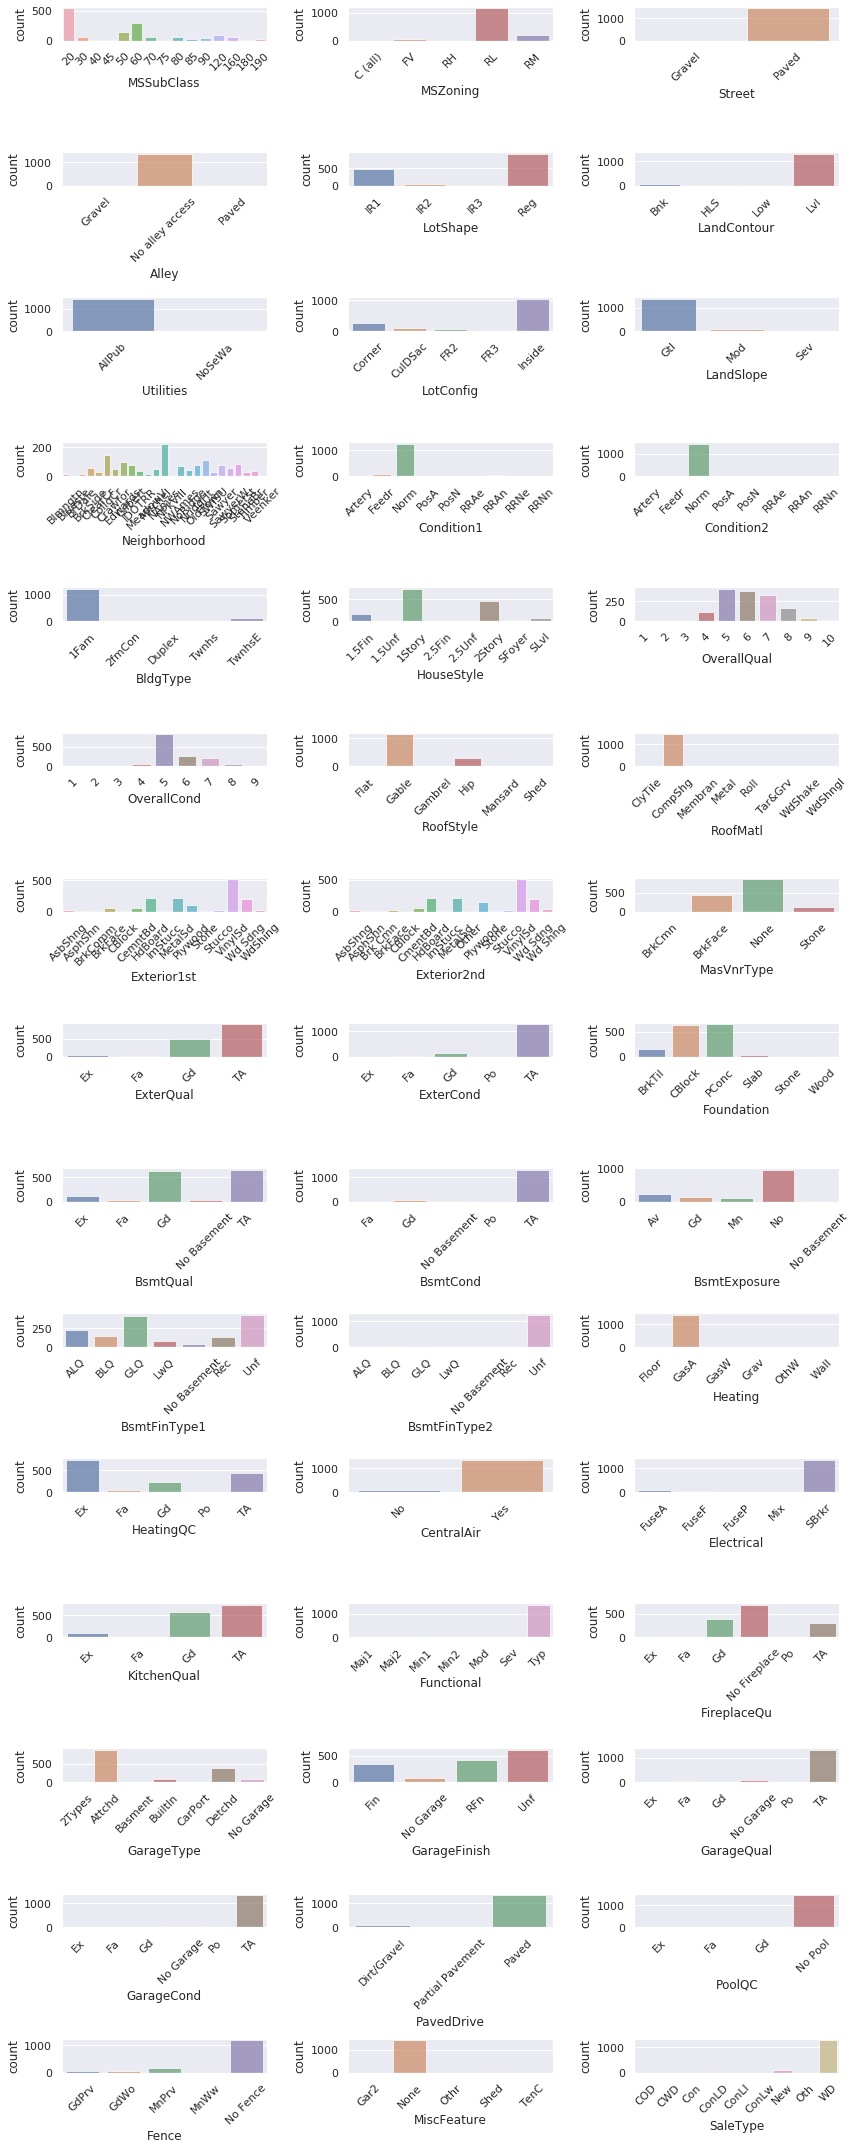

In [90]:
fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

Pour un certain nombre de variables catégorielles, une modalité représente la très grande majorité de l'information. Par conséquent, les variables n'ont pas à être prises en compte par la suite dans le modèle. On pourra ne pas considérer les variables suivantes MSZoning, Street, Alley, LandContour, Utilities, LandSlope, Condition1, Condition2, BldgType, RoofMatl, BsmtCond, Heating, BsmtFinType2, CentralAir, Functional, GarageQual, GarageCond, PoolQC,MiscFeature.
On peut observer aussi que la qualité de la finition de la maison s'apparente à une gaussienne.

### Conclusion sur l'analyse univariée

On a pu voir que :
* notre cible de prix de vente suit une loi LogNormal
* un certain nombre de variables numériques ont aussi un comportement assez similaire à notre target en termes de distribution
* une élimination naturelle des variables catégorielles n'apportant pas d'informations.

## Analyse bivariée

L'analyse bivariée va consister à regarder l'influence de différentes variables sur la variable cible.


### Les variables quantitatives

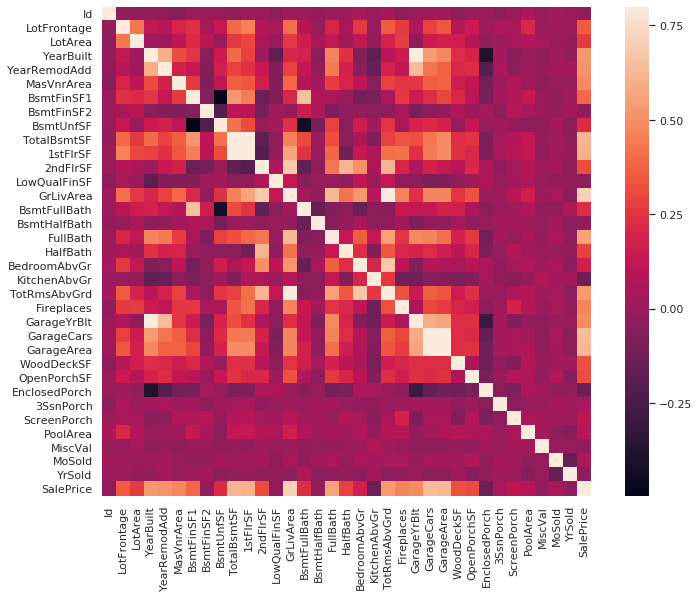

In [91]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

La matrice de corrélation entre les variables quantitatives avec de nombreuses variables permet néanmoins d'extraire des informations intéressantes :
* les variables qui sont très fortement corrélées entre elles : on pourra citer YearBuilt et GarageYrBlt, GarageCars et GarageArea et TotalBsmtSF et 1FstFlrSF. Une des deux variables pourra être ignorée dans le cas de la prédiction car elles transmettent une information identique.
* un focus spécifique sur la variable à prédire : on peut observer qu'elle est fortement liée positivement à GrLivArea, TotalBsmtSF, GarageCars pour les plus significatives. Elle a l'air corrélée négativement avec KitchenAbvGr et EnclosedPorch.

In [0]:
dfSalePrice = corr[np.abs(corr['SalePrice'])>0.5]['SalePrice']
dfSalePrice = dfSalePrice.drop('SalePrice')

Text(0, 0.5, 'Corrélation en absolu')

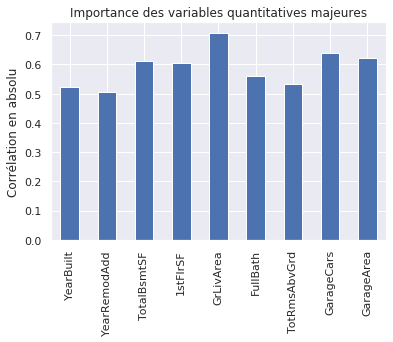

In [93]:
impSalePrice = dfSalePrice.plot(kind="bar")
impSalePrice.set_title("Importance des variables quantitatives majeures")
impSalePrice.set_ylabel("Corrélation en absolu")

On regarde à travers un scatterplot pour visualiser la relation entre les variables numériques les plus significatives (en gardant uniquement une variable si problème de colinéarité) avec la variable cible.

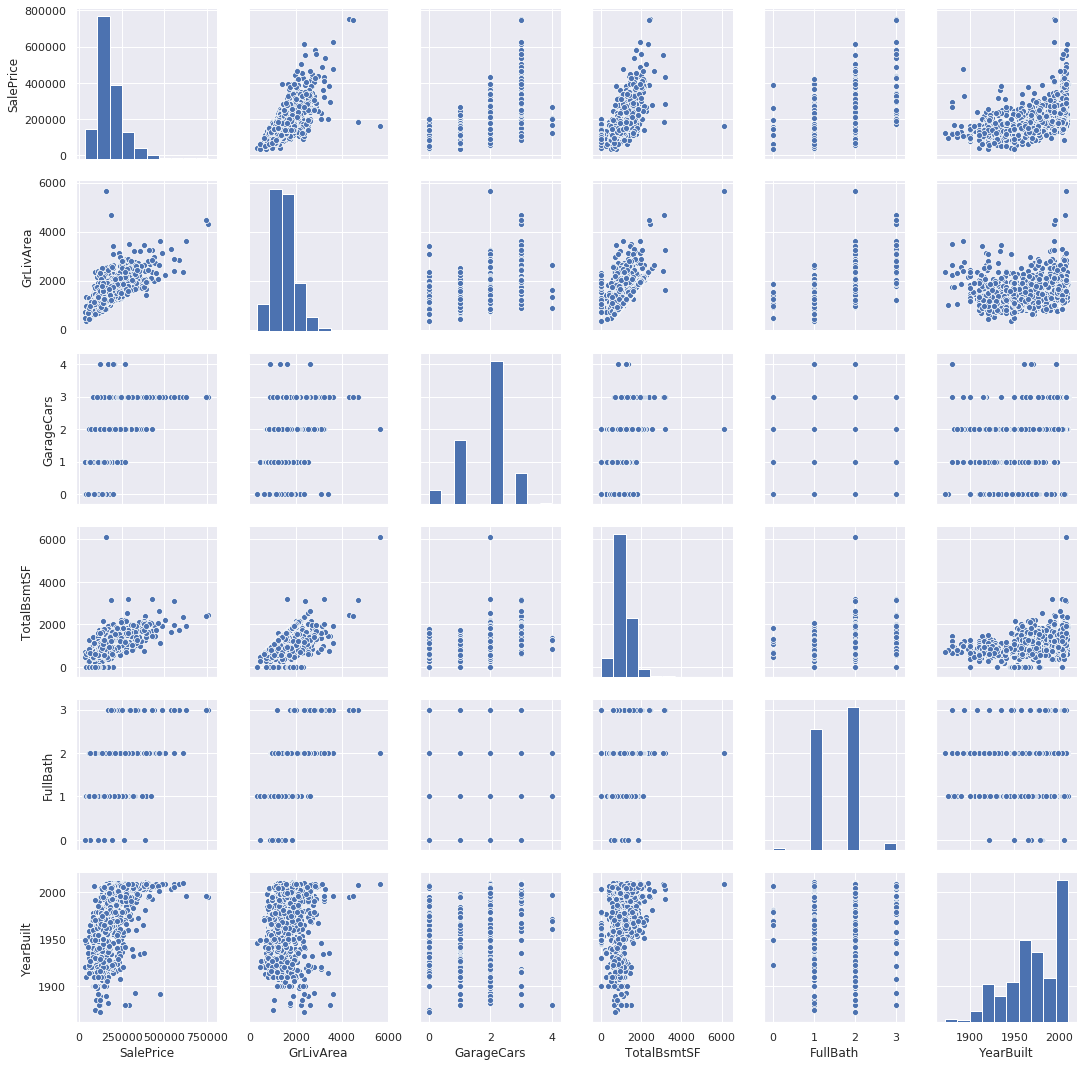

In [94]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], height = 2.5)
plt.show();

Le prix de vente semble en tendance évoluer positivement fonction du nombre de places de parkings et de salle de bains (même s'il existe une certaine disparité). Faisons un focus sur des liens entre certaines variables avec la variable cible.

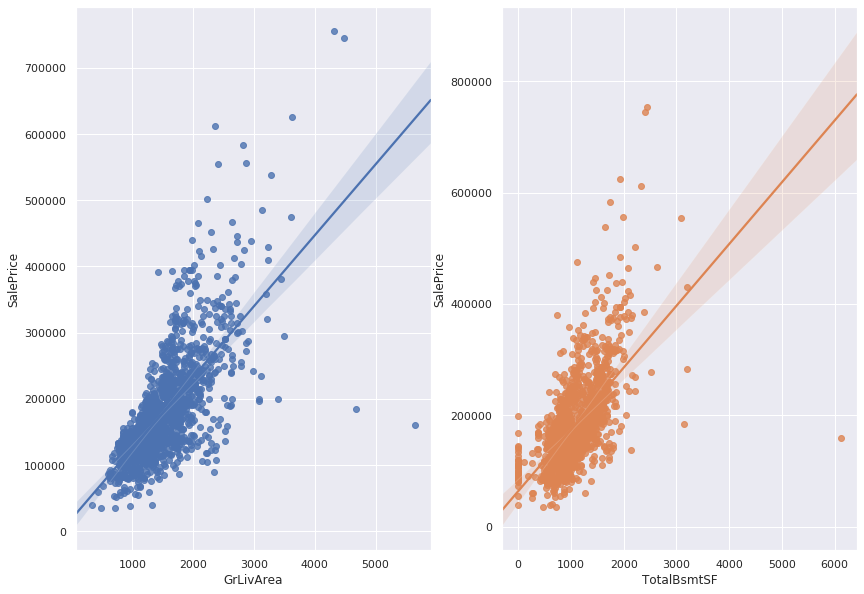

In [95]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(14,10)
sns.regplot(x="GrLivArea",y="SalePrice",data=df, ax=ax1)
sns.regplot(x="TotalBsmtSF",y="SalePrice",data=df,ax=ax2)


Le prix de vente évolue positivement fonction de la surface totale habitable et de l'emprise au sol.

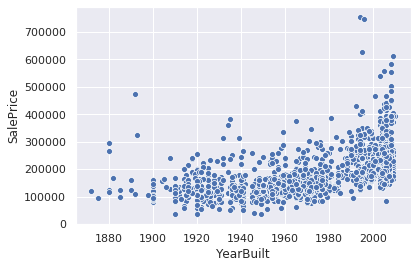

In [96]:
sns.scatterplot(x="YearBuilt",y="SalePrice",data=df)

Le prix de vente semble augmenter en fonction de l'année de construction. Peut-être à prendre avec précaution car nous ne savons pas si les prix de vente sont en prix constant. Dans le cas contraire, cela reflète l'inflation de 1880 à 2010.

### Les variables catégorielles

En croisant les variables catégorielles, il est possible de trouver des relations logiques avec notre cible. Pour certaines analyses, il est nécessaire d'avoir une vision métier supplémentaire par exemple pour la logique géographique au niveau des districts (neighborhood) qui peut faire sens pour une personne connaissant le marché immobilier ou qui nécessiterait d'introduire du featuring engeenering avec le niveau de vie moyen par district.

Text(0.5, 1, 'Distribution Prix / Neighborhood')

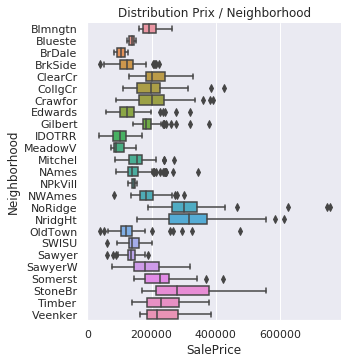

In [97]:
sns.catplot(x="SalePrice", y="Neighborhood", kind="box",data=df)
plt.title("Distribution Prix / Neighborhood")

Text(0.5, 1, 'Distribution Prix / OverallQual')

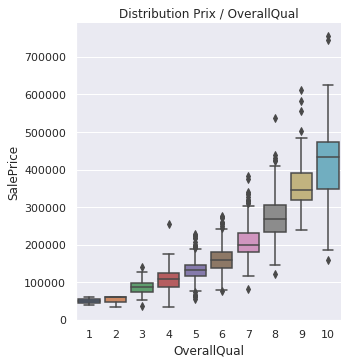

In [98]:
sns.catplot(x="OverallQual", y="SalePrice", kind="box", data=df)
plt.title("Distribution Prix / OverallQual")

On observe de manière naturelle que le prix de vente dépend de l'évaluation de la qualité des matériaux et de la finition de la maison.

Text(0.5, 1, 'Distribution Prix / FireplaceQu')

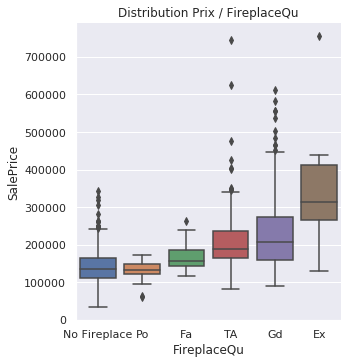

In [99]:
sns.catplot(x="FireplaceQu", y="SalePrice", kind="box", order=["No Fireplace", "Po", "Fa", "TA", "Gd", "Ex"], data=df)
plt.title("Distribution Prix / FireplaceQu")

Les variables avec une échelle de valeur comme FirePlaceQu (KitchenQual, HeatingQC, BsmtExposure,BsmtCond, BsmtQual, ...) ont un prix qui en tendance évolue positivement fonction d'une note élevée fonction du critère étudiée ce qui apparaît logique avec néanmoins des points atypiques pour certaines modalités. 

### Conclusion sur l'analyse bivariée

La target est sensible : 
* à des variables numériques les plus discriminantes comme la surface, le nombre de places de garage/salle de bain...
* à des variables catégorielles comme des échelles de valeurs allant de mauvais à excellent...
* certaines variables catégorielles peuvent faire sens mais nécessite une expertise métier.

## Analyse multivariée

In [0]:
df["GlobalQuality"] =df["OverallQual"].replace({1:"Mauvais",2:"Mauvais",3:"Faible",4:"Faible",5:"Moyen",6:"Moyen",7:"Bon",8:"Bon",9:"Excellent",10:"Excellent"}) 


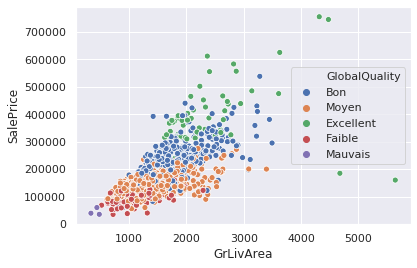

In [101]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="GlobalQuality", data=df)

On peut observer que le prix dépend fortement de la surface et de la qualité de la maison. Les maisons les plus chères sont les plus grandes avec une très bonne notation et inversement.

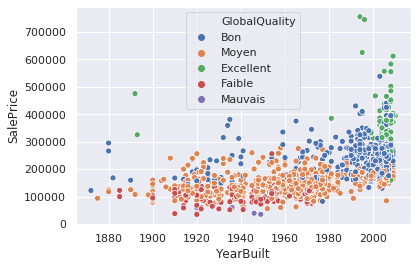

In [102]:
sns.scatterplot(x="YearBuilt", y="SalePrice", hue="GlobalQuality", data=df)

On avait pu observer que le prix de vente (moyennant le fait qu'on ne sait si on raisonne en prix constant) augmente en tendance fonction de l'année de construction. On observe aussi que l'appréciation de qualité est plus élevée (bon, excellent) si la maison est récente.

### Conclusion sur l'analyse multivariée

D'autres analyses multivariées auraient pu être réalisées aux vues du nombre de variables dans le jeu de données. Nous avons isolé quelques analyses multivariées permettant de voir des tendances entre certaines variables et la variable cible.

L'analyse exploratoire nous a permis :
* de voir la distribution de notre variable cible
* d'éliminer certaines variables catégorielles ne présentant pas d'information utile dans le cas de sur-représentation d'une modalité majoritaire
* d'éliminer les variables numériques qui ont une corrélation très importantes entre elles : elles expriment le même type d'information
* les liens à travers les variables catégorielles et numériques significatives par rapport à notre cible à travers des analyses bivariées ou multivariées.

# Preprocessing pour scikit-learn

## Lecture des données

In [103]:
df_train = pd.read_csv("https://raw.githubusercontent.com/anthonymoisan/DeepLearningPredictHousePrices/master/input/train.csv")
print("taille du jeu de donnees train :", df_train.shape)
df_test = pd.read_csv("https://raw.githubusercontent.com/anthonymoisan/DeepLearningPredictHousePrices/master/input/test.csv")
print("taille du jeu de donnees test :", df_test.shape)

taille du jeu de donnees train : (1460, 81)
taille du jeu de donnees test : (1459, 80)


L'ensemble de train est l'ensemble d'apprentissage sur lequel on va construire et valider notre modèle. L'ensemble de test a le même nombre de variables explicatives et doit permettre d'inférer le prix de ventes avec le modèle. 

## Prise en compte de l'analyse exploratoire

Définition des variables catégorielles et des champs NA

In [0]:
DefineCategoricalVariableAndDefineNa(df_train)

L'analyse exploratoire a permis d'identifier des variables numériques et catégorielles à enlever car n'apportant pas d'informations.

In [105]:
listDropNumerical = ["Id", "GarageYrBlt",  "GarageCars", "1stFlrSF"] 
listDropCategorical = ["MSZoning", "Street", "Alley", "LandContour", "Utilities", "LandSlope", "Condition1", "Condition2", "BldgType", "RoofMatl", "BsmtCond", "Heating", "BsmtFinType2", "CentralAir", "Functional", "GarageQual", "GarageCond", "PoolQC","MiscFeature"]
print("Nombre de variables catégoriques à supprimer : " + str(len(listDropCategorical)))
print("Nombre de variables numériques à supprimer : " + str(len(listDropNumerical)))

Nombre de variables catégoriques à supprimer : 19
Nombre de variables numériques à supprimer : 4


In [0]:
df_train = df_train.drop(listDropNumerical, axis = 1)
df_train = df_train.drop(listDropCategorical, axis = 1)

In [107]:
print("Taille du dataset suite à prétraitements : ", df_train.shape)

Taille du dataset suite à prétraitements :  (1460, 58)


## Construction des ensembles X et y à partir du dataframe

On construit l'ensemble X, y sur le dataframe résultant :

In [0]:
X = df_train.drop(["SalePrice"], axis = 1)
y = df_train["SalePrice"]

## Preprocessing sur les variables catégorielles

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

Scikit-learn ne reconnait pas les objets de type DataFrame directement, notamment les types catégoriels. Il faut donc préparer nos données afin que les méthodes de scikit-learn puissent les interpréter. Scikit learn requiert un encodage numérique des ces variables. Nous allons donc devoir encoder nos variables explicatives catégorielles à l'aide de variables indicatrices et nous utilison pour cela OneHotEncooder et on impute les modalités manquantes.

In [110]:
categorical_features = X.columns[X.dtypes == "category"].tolist()
print(categorical_features)

['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [0]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

## Preprocessing sur les variables numériques

Certaines méthodes d'apprentissage sont sensibles aux problèmes d'échelle sur les valeurs numériques. En preprocessing, on standardise les variables numériques en retranchant leur moyenne et en divisant par l'écart type via Scikit-learn et la méthode StandardScaler. Dans le cas présent, on mélange des unités différentes donc la standardisation semble appropriée. On a pu aussi voir qu'il y avait des données manquantes sur certaines variables numériques comme LotFrontage que l'on impute par la moyenne.

In [112]:
numerical_features = X.columns[X.dtypes == "int64"].tolist()+X.columns[X.dtypes == "float64"].tolist()
print(categorical_features)

['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [0]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [0]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

## Train, Val

Nous allons prendre sur le training 70% pour le train et 30% pour la validation

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=777)
print(f"Shape du X_train : {X_train.shape}")
print(f"Shape du y_train : {y_train.shape}")
print(f"Shape du X_test : {X_test.shape}")
print(f"Shape du y_test : {y_test.shape}")

Shape du X_train : (1022, 57)
Shape du y_train : (1022,)
Shape du X_test : (438, 57)
Shape du y_test : (438,)


Nous standardisons aussi notre cible.

In [0]:
Yscaler = StandardScaler()
y_train = Yscaler.fit_transform(y_train[:, None])[:, 0]
y_test = Yscaler.transform(y_test[:, None])[:, 0]

# Des modèles basées sur la régression linéaire 


## Un modèle simple : la régression linéaire

Un premier modèle qui nous servira de *baseline*.

Nous allons aussi introduire l'imputation sur les données sur les données *train*, que nous appliquerons **ENSUITE** sur les données *test*.

### Regression linéaire
$$y =\sum_{i=1}^{n} a_i \times x_i + b$$

In [155]:
from sklearn.linear_model import LinearRegression
clfRegLinear = Pipeline(steps=[('preprocessor', preprocessor), ('LinearRegression', LinearRegression())])
clfRegLinear.fit(X_train,y_train)
y_trainPredict = clfRegLinear.predict(X_train)
y_testPredict = clfRegLinear.predict(X_test)
print("model score sur le train :  %.3f" % clfRegLinear.score(X_train, y_train))
print("model score le test : %.3f" % clfRegLinear.score(X_test, y_test))

model score sur le train :  0.891
model score le test : 0.853


On observe à priori un modèle avec un coefficient de détermination correct et on a une bonne généralisation sur l'ensemble de validation

### Coefficients de la régression linéaire

Un des avantages de la régression linéaire est que nous pouvons obtenir les coefficients associés à chacune des variables. Nous pouvons voir les coefficients qui ont un impact sur le prix de vente.

Regardons ces coefficients :

In [0]:
ohe = (clfRegLinear.named_steps['preprocessor']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_features)
feature_names = np.r_[numerical_features, feature_names]

In [119]:
coefficients = pd.Series(clfRegLinear.named_steps["LinearRegression"].coef_.flatten(), index=feature_names).sort_values(ascending=False)
coefficients

OverallQual_10          0.940247
OverallQual_9           0.742062
Exterior1st_Stone       0.582463
Neighborhood_NoRidge    0.574580
SaleType_New            0.570265
                          ...   
Exterior2nd_CmentBd    -0.490410
HouseStyle_2.5Fin      -0.510151
OverallQual_1          -0.528082
Exterior1st_ImStucc    -0.640948
Foundation_Wood        -0.752301
Length: 234, dtype: float64

In [120]:
print("ordonnee à l'origine : " + str(clfRegLinear.named_steps["LinearRegression"].intercept_))

ordonnee à l'origine : -0.19533366583177567


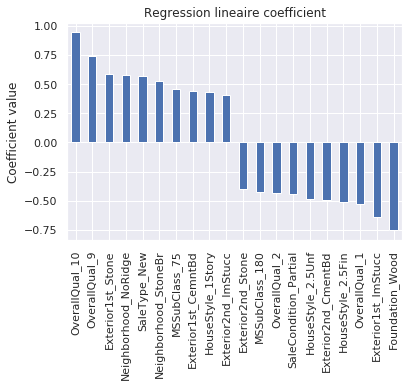

In [121]:
coefficients[np.abs(coefficients)>0.4].plot(kind="bar")
plt.title("Regression lineaire coefficient")
plt.ylabel("Coefficient value")
plt.show()

On observe une cohérence par rapport notamment aux échelles de notation (OverallQual) qui joue de manière positive ou négative sur le prix. On observe aussi qu'être dans les districts NoRidge, StoneBr, NridgHt à un impact positif, des fondations en pierre ou un extérieur en pierre joue de manière positive dans le prix contrairement à des fondations en bois

### Evaluation de la régression avec différentes métriques

Nous allons regarder quelques métriques associées aux problématiques de régression :
* L'erreur maximum entre la prédiction et la réalité
* La moyenne des erreurs absolus entre la prédiction et la réalité
* La moyenne des erreurs au carré entre la prédiction et la réalité (MSE)
* Le score R2 qui est le coefficient de détermination en comparant MSE et la variance. Fonction renvoyée par la méthode score de Scikit Learn

In [0]:
from sklearn import metrics


def regression_metrics(y, y_pred):
    return pd.DataFrame(
        {
            "max_error": metrics.max_error(y_true=y, y_pred=y_pred),
            "mean_absolute_error": metrics.mean_absolute_error(y_true=y, y_pred=y_pred),
            "mean_squared_error": metrics.mean_squared_error(y_true=y, y_pred=y_pred),
            "r2_score": metrics.r2_score(y_true=y, y_pred=y_pred)
        },
        index=[0])

In [123]:
print("Regression metrics for train data")
print(regression_metrics(Yscaler.inverse_transform(y_train), Yscaler.inverse_transform(y_trainPredict)))
print("Regression metrics for test data")
print(regression_metrics(Yscaler.inverse_transform(y_test), Yscaler.inverse_transform(y_testPredict)))

Regression metrics for train data
       max_error  mean_absolute_error  mean_squared_error  r2_score
0  268648.274025         16821.411538        7.489736e+08  0.890839
Regression metrics for test data
       max_error  mean_absolute_error  mean_squared_error  r2_score
0  170230.331078          19058.74088        7.289663e+08  0.852876


On retrouve la bonne généralisation quelque soit la métrique utilisée. Si on regarde en moyenne l'erreur absolu, on se trompe de l'ordre entre 17000 et 19000. Néanmoins, on peut aussi constater qu'avec le modèle de régression linéaire généralisée, on peut se tromper fortement sur l'estimation du prix > 170000.

## Un modèle linéaire Lasso avec une régularisation

### Regression Lasso
Ce modèle intègre en plus un terme de régularisation L1 sur la régression linéaire et force par conséquent un certain nombre de coefficients à être à 0.

In [156]:
from sklearn.linear_model import Lasso
bestScore = 0
bestAlpha = 0
for alpha in [0.00001, 0.0001, 0.001,0.01, 0.1, 1, 10, 100, 1000 ]:
    print("Lasso avec regul : " + str(alpha))
    clfLasso = Pipeline(steps=[('preprocessor', preprocessor), ('LassoRegression', Lasso(alpha=alpha))])
    clfLasso.fit(X_train,y_train)
    #y_trainPredict = clfLasso.predict(X_train)
    #y_testPredict = clfLasso.predict(X_test)
    scoreTest = clfLasso.score(X_test, y_test)
    print("model score sur le train :  %.3f" % clfLasso.score(X_train, y_train))
    print("model score le test : %.3f" % scoreTest)
    if( scoreTest > bestScore):
        bestScore = scoreTest
        bestAlpha = alpha
print("\n\n\n-----------------------------------------------\nLasso best score : %.3f" % bestScore)
print("Lasso best regularization : " + str(bestAlpha))

Lasso avec regul : 1e-05


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.973060312336798, tolerance: 0.10220000000000003
  max_iter, tol, rng, random, positive)


model score sur le train :  0.891
model score le test : 0.855
Lasso avec regul : 0.0001
model score sur le train :  0.890
model score le test : 0.864
Lasso avec regul : 0.001
model score sur le train :  0.882
model score le test : 0.887
Lasso avec regul : 0.01
model score sur le train :  0.826
model score le test : 0.871
Lasso avec regul : 0.1
model score sur le train :  0.707
model score le test : 0.775
Lasso avec regul : 1
model score sur le train :  0.000
model score le test : -0.017
Lasso avec regul : 10
model score sur le train :  0.000
model score le test : -0.017
Lasso avec regul : 100
model score sur le train :  0.000
model score le test : -0.017
Lasso avec regul : 1000
model score sur le train :  0.000
model score le test : -0.017



-----------------------------------------------
Lasso best score : 0.887
Lasso best regularization : 0.001


Une régularisation importante conduit à des résultats surprenants qui peuvent s'expliquer peut-être par la standardisation de la variable y (sans la standardisation de celle-ci, les coefficients étaient beaucoup plus grands et le paramètre de régularisation optimale était de 100).

### Coefficients de la régression Lasso

In [157]:
clfLasso = Pipeline(steps=[('preprocessor', preprocessor), ('LassoRegression', Lasso(alpha=0.001))])
clfLasso.fit(X_train,y_train)
y_trainPredictLasso = clfLasso.predict(X_train)
y_testPredictLasso = clfLasso.predict(X_test)
print("model score sur le train :  %.3f" % clfLasso.score(X_train, y_train))
print("model score le test : %.3f" % clfLasso.score(X_test, y_test))

coefficientsLasso = pd.Series(clfLasso.named_steps["LassoRegression"].coef_.flatten(), index=feature_names).sort_values(ascending=False)
print("\nCoefficients totaux : "+ str(len(coefficientsLasso)))
print("Dont coefficients nuls : "+ str(sum(coefficientsLasso == 0)))

model score sur le train :  0.882
model score le test : 0.887

Coefficients totaux : 234
Dont coefficients nuls : 111


In [126]:
coefficientsLasso

OverallQual_10          0.900954
OverallQual_9           0.781774
Neighborhood_NoRidge    0.573501
Neighborhood_StoneBr    0.479460
Neighborhood_NridgHt    0.364574
                          ...   
MSSubClass_120         -0.146227
BsmtQual_No Basement   -0.151211
Neighborhood_Edwards   -0.250958
MSSubClass_160         -0.257290
LotShape_IR3           -0.350952
Length: 234, dtype: float64

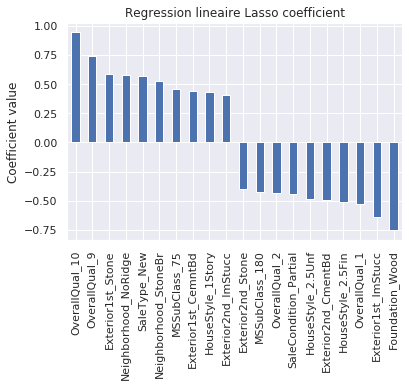

In [127]:
coefficients[np.abs(coefficients)>0.4].plot(kind="bar")
plt.title("Regression lineaire Lasso coefficient")
plt.ylabel("Coefficient value")
plt.show()

### Evaluation de la régression Lasso avec différentes métriques

In [128]:
print("Regression metrics for train data")
print(regression_metrics(Yscaler.inverse_transform(y_train), Yscaler.inverse_transform(y_trainPredictLasso)))
print("Regression metrics for test data")
print(regression_metrics(Yscaler.inverse_transform(y_test), Yscaler.inverse_transform(y_testPredictLasso)))

Regression metrics for train data
       max_error  mean_absolute_error  mean_squared_error  r2_score
0  309318.171409         16624.623402        8.089878e+08  0.882092
Regression metrics for test data
       max_error  mean_absolute_error  mean_squared_error  r2_score
0  150555.331076         16747.844669        5.614283e+08  0.886689


## Conclusion sur les régressions linéaires

* Les régressions linéaires généralisées et Lasso réalisées mettent en avant les mêmes variables explicatives et ont des scores assez similaires avec des coefficients de détermination correctes.
* Suivant la métrique à considérer, un modèle pourra être mis en avant. Néanmoins, la régression Lasso met presque la moitié des coefficients à nul ce qui facilite aussi l'interprétation des résultats.
* Néanmoins il apparait assez surprenant de ne pas retrouver dans les variables prépondérantes les variables numériques comme GrLivArea

In [129]:
("Reg Linéaire : ", coefficients["GrLivArea"], "Reg Lasso : ", coefficientsLasso["GrLivArea"])

('Reg Linéaire : ', 0.16389762960965606, 'Reg Lasso : ', 0.1889702781769011)

En termes de perspectives : 
* une validation croisée pourrait être mise en oeuvre pour définir plus précisément le modèle en étant robuste à la détermination de l'ensemble d'apprentissage et de validation
* du featuring engineering pourrait être réalisé pour agréger éventuellement les données sur les surfaces afin qu'elle ressorte plus distinctement dans la régression comme un facteur explicatif du prix.

#Réseau de neurones

## Librairies nécessaires

In [130]:
!pip install git+https://github.com/tensorflow/docs
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

print(tf.__version__)

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-_xe8z2gx
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-_xe8z2gx
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=80660 sha256=78d30590076354c34ad6cdb8d5b5e7daf50927ed5bfe853caac41ede3e2aa408
  Stored in directory: /tmp/pip-ephem-wheel-cache-8s720n2l/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
2.1.0-rc1


## Préprocessing sur les données

On réutilise les transformations précédentes sur les variables numériques et catégorielles :
* pour les variables catégorielles : OneHotEncoding et imputation des valeurs manquantes
* pour les variables numériques : recalibration entre 0 et 1 et imputation des valeurs manquantes par la moyenne.

In [132]:
print("shape de X_train : " + str(X_train.shape))
print("shape de X_test : " + str(X_test.shape))
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
print("shape de X_train_transformed : "+ str(X_train_transformed.shape))
print("shape de X_test_transformed : "+ str(X_test_transformed.shape))

shape de X_train : (1022, 57)
shape de X_test : (438, 57)
shape de X_train_transformed : (1022, 234)
shape de X_test_transformed : (438, 234)


La target à savoir le prix de vente est aussi entre 0 et 1 car nous avions déjà appliqué un processus de standardisation et cela peut avoir de l'importance car non seulement, cela facilite la phase d'apprentissage mais peut aussi donner des résultats meilleurs dans le modèle de régression avec un réseau de neurones. 

In [160]:
dimInput = X_train_transformed.shape[1]
print("Dimension de la couche visible du réseau :", dimInput)

Dimension de la couche visible du réseau : 234


## Architectures du réseau de neurones

In [0]:
def build_model(unitsLayer1 =64, unitsLayer2 = 64, dropOut=False):
  model = keras.Sequential()
  model.add(layers.Dense(unitsLayer1, activation='relu', input_shape=[dimInput]))
  if(dropOut):
    model.add(layers.Dropout(0.3))
  model.add(layers.Dense(unitsLayer2, activation='relu'))
  if(dropOut):
    model.add(layers.Dropout(0.3))
  model.add(layers.Dense(1, activation="linear"))
  
  

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
def build_model_4Layers(unitsLayer1 = 32, unitsLayer2 = 16, unitsLayer3 = 8, unitsLayer4 = 4, dropOut=False):
  model = keras.Sequential()
  model.add(layers.Dense(unitsLayer1, activation='relu', input_shape=[dimInput]))
  if(dropOut):
    model.add(layers.Dropout(0.05))
  model.add(layers.Dense(unitsLayer2, activation='relu'))
  if(dropOut):
    model.add(layers.Dropout(0.05))
  model.add(layers.Dense(unitsLayer3, activation='relu'))
  if(dropOut):
    model.add(layers.Dropout(0.05))
  model.add(layers.Dense(unitsLayer4, activation='relu'))
  if(dropOut):
    model.add(layers.Dropout(0.05))
  model.add(layers.Dense(1, activation="linear"))  

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

### Modèle avec 2 couches cachées et 64 neurones

In [0]:
model_64_64_1 = build_model()

In [137]:
model_64_64_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                15040     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 19,265
Trainable params: 19,265
Non-trainable params: 0
_________________________________________________________________


La fonction summary permet d'inspecter le réseau de neurones et de voir le nombre de paramètres associés à chaque couche. Par exemple 15040 correspond au 234 features + 1 pour le biais multipliés par 64 (le nombre de neurones de la première couche cachée).

In [138]:
model_64_64_1_DropOut = build_model(dropOut=True)
model_64_64_1_DropOut.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                15040     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 19,265
Trainable params: 19,265
Non-trainable params: 0
_________________________________________________________________


__**Initialement**__ : on s'est rendu compte après la phase d'entrainement d'un overfitting important. On initialise la même architecture mais en utilisant la fonctionnalité dropOut pour désactiver 30% des neurones pendant la phase d'entrainement de manière aléatoire dans les couches cachées.

### Modèle avec 2 couches cachées et 32 neurones

In [139]:
model_32_32_1 = build_model(unitsLayer1=32, unitsLayer2 =32, dropOut=False)
model_32_32_1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                7520      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 33        
Total params: 8,609
Trainable params: 8,609
Non-trainable params: 0
_________________________________________________________________


In [140]:
model_32_32_1_DropOut = build_model(unitsLayer1=32, unitsLayer2 =32,dropOut=True)
model_32_32_1_DropOut.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                7520      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 33        
Total params: 8,609
Trainable params: 8,609
Non-trainable params: 0
_________________________________________________________________


### Modèle avec 4 couches cachées

In [141]:
model_32_16_8_4_1 = build_model_4Layers()
model_32_16_8_4_1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                7520      
_________________________________________________________________
dense_35 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 5         
Total params: 8,225
Trainable params: 8,225
Non-trainable params: 0
_________________________________________________________________


In [142]:
model_32_16_8_4_1_DropOut = build_model_4Layers(dropOut=True)
model_32_16_8_4_1_DropOut.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 32)                7520      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_14 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_42 (Dense)             (None, 4)               

## Entrainement et évaluation des réseaux de neurones

In [0]:
def TrainingNetwork(model, networkName, callback=False):
  # train the model
  import time
  start_time = time.time()
  if(callback):
    print("Training model network " + networkName + " with Callback")
  else :
    print("Training model network " + networkName)
  
  if(callback):
    # The patience parameter is the amount of epochs to check for improvement
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    model.fit(X_train_transformed.toarray(), y_train, validation_data=(X_test_transformed.toarray(), y_test), epochs=200, batch_size=32, callbacks=[early_stop])
  else:
    model.fit(X_train_transformed.toarray(), y_train, validation_data=(X_test_transformed.toarray(), y_test), epochs=200, batch_size=32)  
  print("Temps d'entrainement %s seconds ---" % (time.time() - start_time))


In [0]:
def PredictionAndEvaluationNetwork(model, networkName, callback=False):
  # make predictions on the testing data
  if(callback):
    print("Predicting house prices model network "+ networkName + " with Callback")
  else :
    print("Predicting house prices model network "+ networkName)
  y_testPredict = model.predict(X_test_transformed.toarray())
  y_trainPredict = model.predict(X_train_transformed.toarray())
  print("Regression metrics for train data")
  print(regression_metrics(Yscaler.inverse_transform(y_train), Yscaler.inverse_transform(y_trainPredict)))
  print("Regression metrics for test data")
  print(regression_metrics(Yscaler.inverse_transform(y_test), Yscaler.inverse_transform(y_testPredict)))


### Modèle avec 2 couches cachées et 64 neurones

In [145]:
TrainingNetwork(model_64_64_1, str(64) +" * " + str(64) + " * 1")
PredictionAndEvaluationNetwork(model_64_64_1, str(64) +" * " + str(64) + " * 1")

Training model network 64 * 64 * 1
Train on 1022 samples, validate on 438 samples
Epoch 1/200
1022/1022 [==============================] - 1s 515us/sample - loss: 0.3582 - mae: 0.3893 - mse: 0.3582 - val_loss: 0.1369 - val_mae: 0.2723 - val_mse: 0.1369
Epoch 2/200
1022/1022 [==============================] - 0s 131us/sample - loss: 0.2031 - mae: 0.2690 - mse: 0.2031 - val_loss: 0.1123 - val_mae: 0.2392 - val_mse: 0.1123
Epoch 3/200
1022/1022 [==============================] - 0s 138us/sample - loss: 0.1554 - mae: 0.2352 - mse: 0.1554 - val_loss: 0.1071 - val_mae: 0.2372 - val_mse: 0.1071
Epoch 4/200
1022/1022 [==============================] - 0s 132us/sample - loss: 0.1369 - mae: 0.2008 - mse: 0.1369 - val_loss: 0.1017 - val_mae: 0.2249 - val_mse: 0.1017
Epoch 5/200
1022/1022 [==============================] - 0s 136us/sample - loss: 0.1197 - mae: 0.1844 - mse: 0.1197 - val_loss: 0.1000 - val_mae: 0.2237 - val_mse: 0.1000
Epoch 6/200
1022/1022 [==============================] - 0s 158

On observe dans le cas présent un overfitting important sur le train par rapport à l'ensemble de validation. Une petite optimisation pour éviter de réaliser tous epoch est de mettre en place un callback et regarder si la fonction val_loss ne s'améliore pas de manière significative pendant une certaine période.

In [146]:
TrainingNetwork(model_64_64_1, str(64) +" * " + str(64) + " * 1", callback=True)
PredictionAndEvaluationNetwork(model_64_64_1, str(64) +" * " + str(64) + " * 1", callback=True)

Training model network 64 * 64 * 1 with Callback
Train on 1022 samples, validate on 438 samples
Epoch 1/200
1022/1022 [==============================] - 0s 133us/sample - loss: 0.0024 - mae: 0.0337 - mse: 0.0024 - val_loss: 0.0837 - val_mae: 0.1954 - val_mse: 0.0837
Epoch 2/200
1022/1022 [==============================] - 0s 138us/sample - loss: 0.0027 - mae: 0.0354 - mse: 0.0027 - val_loss: 0.0822 - val_mae: 0.1958 - val_mse: 0.0822
Epoch 3/200
1022/1022 [==============================] - 0s 136us/sample - loss: 0.0037 - mae: 0.0392 - mse: 0.0037 - val_loss: 0.0816 - val_mae: 0.1924 - val_mse: 0.0816
Epoch 4/200
1022/1022 [==============================] - 0s 155us/sample - loss: 0.0026 - mae: 0.0350 - mse: 0.0026 - val_loss: 0.0824 - val_mae: 0.1966 - val_mse: 0.0824
Epoch 5/200
1022/1022 [==============================] - 0s 131us/sample - loss: 0.0028 - mae: 0.0355 - mse: 0.0028 - val_loss: 0.0814 - val_mae: 0.1980 - val_mse: 0.0814
Epoch 6/200
1022/1022 [==========================

On observe toujours un overfitting important avec cette architecture malgré la mise en place du callback qui a juste limité le nombre d'epoch dans le cas présent mais aurait pu dans d'autres cas limiter le surapprentissage.

In [147]:
print("Prise en compte du dropout dans le training dans les couches cachées avec rate = 30%")
TrainingNetwork(model_64_64_1_DropOut, str(64) +" * " + str(64) + " * 1", callback=True)
PredictionAndEvaluationNetwork(model_64_64_1_DropOut, str(64) +" * " + str(64) + " * 1", callback=True)

Prise en compte du dropout dans le training dans les couches cachées avec rate = 30%
Training model network 64 * 64 * 1 with Callback
Train on 1022 samples, validate on 438 samples
Epoch 1/200
1022/1022 [==============================] - 1s 575us/sample - loss: 0.5668 - mae: 0.5177 - mse: 0.5668 - val_loss: 0.1679 - val_mae: 0.2852 - val_mse: 0.1679
Epoch 2/200
1022/1022 [==============================] - 0s 147us/sample - loss: 0.4131 - mae: 0.4307 - mse: 0.4131 - val_loss: 0.1333 - val_mae: 0.2507 - val_mse: 0.1333
Epoch 3/200
1022/1022 [==============================] - 0s 126us/sample - loss: 0.4482 - mae: 0.3884 - mse: 0.4482 - val_loss: 0.1255 - val_mae: 0.2528 - val_mse: 0.1255
Epoch 4/200
1022/1022 [==============================] - 0s 124us/sample - loss: 0.2971 - mae: 0.3450 - mse: 0.2970 - val_loss: 0.0928 - val_mae: 0.2097 - val_mse: 0.0928
Epoch 5/200
1022/1022 [==============================] - 0s 137us/sample - loss: 0.2978 - mae: 0.3318 - mse: 0.2978 - val_loss: 0.0912 

On observe toujours un peu de surapprentissage mais de manière moindre grâce au dropout. Je me suis inspiré pour partie : https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

### Modèle avec 2 couches cachées et 32 neurones

In [148]:
TrainingNetwork(model_32_32_1, str(32) +" * " + str(32) + " * 1", callback=True)
PredictionAndEvaluationNetwork(model_32_32_1, str(32) +" * " + str(32) + " * 1", callback=True)

Training model network 32 * 32 * 1 with Callback
Train on 1022 samples, validate on 438 samples
Epoch 1/200
1022/1022 [==============================] - 1s 496us/sample - loss: 0.4919 - mae: 0.4722 - mse: 0.4919 - val_loss: 0.1738 - val_mae: 0.3078 - val_mse: 0.1738
Epoch 2/200
1022/1022 [==============================] - 0s 124us/sample - loss: 0.2340 - mae: 0.3074 - mse: 0.2340 - val_loss: 0.1352 - val_mae: 0.2704 - val_mse: 0.1352
Epoch 3/200
1022/1022 [==============================] - 0s 120us/sample - loss: 0.1813 - mae: 0.2611 - mse: 0.1813 - val_loss: 0.1152 - val_mae: 0.2492 - val_mse: 0.1152
Epoch 4/200
1022/1022 [==============================] - 0s 128us/sample - loss: 0.1531 - mae: 0.2308 - mse: 0.1531 - val_loss: 0.1112 - val_mae: 0.2453 - val_mse: 0.1112
Epoch 5/200
1022/1022 [==============================] - 0s 130us/sample - loss: 0.1315 - mae: 0.2081 - mse: 0.1315 - val_loss: 0.0936 - val_mae: 0.2230 - val_mse: 0.0936
Epoch 6/200
1022/1022 [==========================

On a toujours un surpapprentissage et des différences non significatives par rapport à l'architecture 64 * 64 sur l'ensemble de validation. A noter que le modèle a deux fois moins de paramètres par rapport au réseau avec 32 neurones.

In [149]:
print("Prise en compte du dropout dans le training dans les couches cachées avec rate = 30%")
TrainingNetwork(model_32_32_1_DropOut, str(32) +" * " + str(32) + " * 1",callback=True)
PredictionAndEvaluationNetwork(model_32_32_1_DropOut, str(32) +" * " + str(32) + " * 1",callback=True)

Prise en compte du dropout dans le training dans les couches cachées avec rate = 30%
Training model network 32 * 32 * 1 with Callback
Train on 1022 samples, validate on 438 samples
Epoch 1/200
1022/1022 [==============================] - 1s 558us/sample - loss: 0.7913 - mae: 0.6182 - mse: 0.7913 - val_loss: 0.2306 - val_mae: 0.3265 - val_mse: 0.2306
Epoch 2/200
1022/1022 [==============================] - 0s 129us/sample - loss: 0.5164 - mae: 0.5070 - mse: 0.5164 - val_loss: 0.1468 - val_mae: 0.2684 - val_mse: 0.1468
Epoch 3/200
1022/1022 [==============================] - 0s 125us/sample - loss: 0.4559 - mae: 0.4470 - mse: 0.4559 - val_loss: 0.1493 - val_mae: 0.2827 - val_mse: 0.1493
Epoch 4/200
1022/1022 [==============================] - 0s 129us/sample - loss: 0.5289 - mae: 0.4075 - mse: 0.5289 - val_loss: 0.1264 - val_mae: 0.2432 - val_mse: 0.1264
Epoch 5/200
1022/1022 [==============================] - 0s 121us/sample - loss: 0.3019 - mae: 0.3756 - mse: 0.3019 - val_loss: 0.1178 

On arrive à une conclusion identique que l'architecture 64 par 64 avec une limitation du surapprentissage grâce aux paramètres DropOut sur les couches intermédiaires.

### Modèle avec 4 couches cachées

In [150]:
TrainingNetwork(model_32_16_8_4_1, str(32) +" * " + str(16) + " * " + str(8) + " * " + str(4)  + " * 1", callback=True)
PredictionAndEvaluationNetwork(model_32_16_8_4_1,str(32) +" * " + str(16) + " * " + str(8) + " * " + str(4)  + " * 1", callback=True)

Training model network 32 * 16 * 8 * 4 * 1 with Callback
Train on 1022 samples, validate on 438 samples
Epoch 1/200
1022/1022 [==============================] - 1s 650us/sample - loss: 0.8072 - mae: 0.5355 - mse: 0.8072 - val_loss: 0.4380 - val_mae: 0.3809 - val_mse: 0.4380
Epoch 2/200
1022/1022 [==============================] - 0s 143us/sample - loss: 0.6537 - mae: 0.4372 - mse: 0.6537 - val_loss: 0.3487 - val_mae: 0.3390 - val_mse: 0.3487
Epoch 3/200
1022/1022 [==============================] - 0s 134us/sample - loss: 0.4878 - mae: 0.3746 - mse: 0.4878 - val_loss: 0.2179 - val_mae: 0.2758 - val_mse: 0.2179
Epoch 4/200
1022/1022 [==============================] - 0s 140us/sample - loss: 0.3150 - mae: 0.3007 - mse: 0.3150 - val_loss: 0.1286 - val_mae: 0.2268 - val_mse: 0.1286
Epoch 5/200
1022/1022 [==============================] - 0s 137us/sample - loss: 0.2199 - mae: 0.2558 - mse: 0.2199 - val_loss: 0.1100 - val_mae: 0.2218 - val_mse: 0.1100
Epoch 6/200
1022/1022 [==================

Le résultat de cette architecture 4 couches expose toujours du surapprentissage mais dans une mesure moindre que les archictectures 2 couches avec 32 ou 64 neurones sans dropout.

In [151]:
print("Prise en compte du dropout dans le training dans les couches cachées avec rate = 5%")
TrainingNetwork(model_32_16_8_4_1_DropOut, str(32) +" * " + str(16) + " * " + str(8) + " * " + str(4)  + " * 1", callback=True)
PredictionAndEvaluationNetwork(model_32_16_8_4_1_DropOut,str(32) +" * " + str(16) + " * " + str(8) + " * " + str(4)  + " * 1", callback=True)

Prise en compte du dropout dans le training dans les couches cachées avec rate = 5%
Training model network 32 * 16 * 8 * 4 * 1 with Callback
Train on 1022 samples, validate on 438 samples
Epoch 1/200
1022/1022 [==============================] - 1s 750us/sample - loss: 0.7255 - mae: 0.6286 - mse: 0.7255 - val_loss: 0.3785 - val_mae: 0.4873 - val_mse: 0.3785
Epoch 2/200
1022/1022 [==============================] - 0s 150us/sample - loss: 0.5133 - mae: 0.5200 - mse: 0.5133 - val_loss: 0.2929 - val_mae: 0.4229 - val_mse: 0.2929
Epoch 3/200
1022/1022 [==============================] - 0s 158us/sample - loss: 0.4232 - mae: 0.4525 - mse: 0.4232 - val_loss: 0.2102 - val_mae: 0.3496 - val_mse: 0.2102
Epoch 4/200
1022/1022 [==============================] - 0s 137us/sample - loss: 0.3515 - mae: 0.3823 - mse: 0.3515 - val_loss: 0.1545 - val_mae: 0.2825 - val_mse: 0.1545
Epoch 5/200
1022/1022 [==============================] - 0s 151us/sample - loss: 0.3184 - mae: 0.3422 - mse: 0.3184 - val_loss: 

Le dropout avec 5% sur les couches intermédiaires diminue le surapprentissage.

## Conclusion sur les réseaux de neurones

* Différentes architectures peuvent être testées avec plus ou moins de couches cachées, le nombre de neurones par couche, du tuning fin sur des paramètres comme le dropout ou encore introduire des régularisations sur les données non réalisées dans le cas présent.
* Dans les différentes architectures testées, ma recommandation serait :
 * Réseau 32/32 équivalent au réseau 64/64 mais préférence pour le réseau 32/32 car deux fois moins de paramètres
 * Réseau 4 couches avec un dropOut de 5% a un résultat meilleur que le réseau en deux couches 32/32 et a globalement le même nombre de paramètres. Avec ce paramétrage, on a limité l'overfitting et on obtient une meilleure généralisation.

# Soumission sur le test

On applique les différents modèles en arrondissant les résultats avec uniquement une décimale.

In [0]:
predictionWithLinearRegression = np.around(Yscaler.inverse_transform(clfRegLinear.predict(df_test)), decimals = 1)
predictionWithLassoRegression = np.around(Yscaler.inverse_transform(clfLasso.predict(df_test)), decimals = 1)


On construit un dataframe avec l'id et les résultats des différents modèles

In [153]:
submission = pd.DataFrame({'Id':df_test['Id'],'Linear Reg':predictionWithLinearRegression, 'Lasso Reg':predictionWithLassoRegression})

#Visualize the first 5 rows
submission.head(10)

,Id,Linear Reg,Lasso Reg
0,1461,139589.9,135235.7
1,1462,134848.0,142465.8
2,1463,169168.0,172334.5
3,1464,183926.4,186485.0
4,1465,216373.7,212879.4
5,1466,159265.1,162479.6
6,1467,178109.9,172909.3
7,1468,147748.3,152326.8
8,1469,199902.4,201835.9
9,1470,129195.7,127526.2


In [0]:
#filename = "https://raw.githubusercontent.com/anthonymoisan/DeepLearningPredictHousePrices/master/output/HousePricesPrediction.csv"
#submission.to_csv(filename, index=False, encoding="UTF-8", mode = "wb")
#print('Sauvegarde du fichier : ' filename)